**EXPORT ZIP DATASET AND CREATE DIRECTORY FOR EACH CATEGORIZE OF MEATFRESHNESS**

In [33]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./MeatFreshness.zip", 'r')
zip_ref.extractall('tmp')

zip_ref.close()

# Directory with training fresh meat pictures
train_meat_dir = os.path.join('tmp/MeatFreshness/Training')
train_frmeat_dir = os.path.join('tmp/MeatFreshness/Training/Fresh')
# Directory with training half fresh meat pictures
train_hfmeat_dir = os.path.join('tmp/MeatFreshness/Training/HalfFresh')
# Directory with training spoiled meat pictures
train_spmeat_dir = os.path.join('tmp/MeatFreshness/Training/Spoiled')
# Directory with training not meat pictures 
train_notmeat_dir = os.path.join('tmp/MeatFreshness/Training/NotValidImage')

# Directory with validation fresh meat pictures
val_meat_dir = os.path.join('tmp/MeatFreshness/Validation')
val_frmeat_dir = os.path.join('tmp/MeatFreshness/Validation/Fresh')
# Directory with validation half fresh meat pictures
val_hfmeat_dir = os.path.join('tmp/MeatFreshness/Validation/HalfFresh')
# Directory with validation spoiled meat pictures
val_spmeat_dir = os.path.join('tmp/MeatFreshness/Validation/Spoiled')
# Directory with validation not meat pictures 
val_notmeat_dir = os.path.join('tmp/MeatFreshness/Validation/NotValidImage')
     

**DISTRIBUTE IMAGES TO FOLDERS ACCORDING TO THEIR CLASSES**

In [ ]:
train_frmeat = os.listdir(train_frmeat_dir)
print(train_frmeat[:10])

train_hfmeat = os.listdir(train_hfmeat_dir)
print(train_hfmeat[:10])

train_spmeat = os.listdir(train_spmeat_dir)
print(train_spmeat[:10])

train_notmeat = os.listdir(train_notmeat_dir)
print(train_notmeat[:10])

val_frmeat = os.listdir(val_frmeat_dir)
print(val_frmeat[:10])

val_hfmeat = os.listdir(val_hfmeat_dir)
print(val_hfmeat[:10])

val_spmeat = os.listdir(val_spmeat_dir)
print(val_spmeat[:10])

val_notmeat = os.listdir(val_notmeat_dir)
print(val_notmeat[:10])

['FRESH-1003-_JPG.rf.b410c33a04a1fba90032a9086d191d6d.jpg', 'FRESH-382-_JPG.rf.89a1c88a3a2d44f41dc7a88dd25f480b.jpg', 'FRESH-687-_JPG.rf.ae00b8b00238cf08966497b8efb7de90.jpg', 'FRESH-677-_JPG.rf.db7192d5202c1da71cddc3887885186f.jpg', 'FRESH-651-_JPG.rf.ff4b589f223183502d450c3dc41464cf.jpg', 'FRESH-190-_JPG.rf.5b7c4fac61a0754d48107654d39a6657.jpg', 'FRESH-736-_JPG.rf.96d4df31a18478f1fe7c38471742eb7f.jpg', 'FRESH-927-_JPG.rf.cdf61ec88a4627d433c80950d85e3840.jpg', 'FRESH-219-_JPG.rf.b7f606fa87c80ba18a086aab79f0348a.jpg', 'FRESH-657-_JPG.rf.7c29373730db69b777b01e6919ee2824.jpg']
['HALF-FRESH-908-_JPG.rf.1c27f61b9e2024f4250d7a1a269188d8.jpg', 'HALF-FRESH-83-_JPG.rf.03cb9235a572ddb4d6225a4a8cbe5d42.jpg', 'HALF-FRESH-396-_JPG.rf.39f90b8b113c314a025c4b0055bd0001.jpg', 'HALF-FRESH-342-_JPG.rf.3ba00f574773f7f7d02c6fd8c5e8cc70.jpg', 'HALF-FRESH-439-_JPG.rf.ad178acc45a24b47470e8187c3b14178.jpg', 'HALF-FRESH-98-_JPG.rf.b42149116195a85598b2c42d1b05f0bd.jpg', 'HALF-FRESH-65-_JPG.rf.94479e8e8bf0e8fb8b

In [ ]:
print('total training fresh meat images:', len(os.listdir(train_frmeat_dir)))
print('total training half fresh meat images:', len(os.listdir(train_hfmeat_dir)))
print('total training spoiled meat images: ', len(os.listdir(train_spmeat_dir)))
print('total training not meat images: ', len(os.listdir(train_notmeat_dir)))
print('\n')
print('total validation fresh meat images:', len(os.listdir(val_frmeat_dir)))
print('total validation half fresh meat images:', len(os.listdir(val_hfmeat_dir)))
print('total validation spoiled meat images:', len(os.listdir(val_spmeat_dir)))
print('total validation not meat images: ', len(os.listdir(val_notmeat_dir)))

total training fresh meat images: 675
total training half fresh meat images: 630
total training spoiled meat images:  510
total training not meat images:  600


total validation fresh meat images: 178
total validation half fresh meat images: 159
total validation spoiled meat images: 114
total validation not meat images:  202


In [ ]:
from pathlib import Path

# Create a list with the filepaths for training and testing
train_dir = Path('/content/tmp/MeatFreshness/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/tmp/MeatFreshness/Validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [ ]:
 #Create a DataFrame with the filepath and the labels of the pictures
import numpy as np
import pandas as pd

def image_processing(filepath):
  
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath')
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [ ]:
train_df = image_processing(train_filepaths)
val_df = image_processing(val_filepaths)

In [ ]:
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

Number of different labels: 4

Labels: ['NotValidImage' 'Fresh' 'HalfFresh' 'Spoiled']


In [ ]:
train_df.head(5)

,Filepath,Label
0,/content/tmp/MeatFreshness/Training/NotValidIm...,NotValidImage
1,/content/tmp/MeatFreshness/Training/NotValidIm...,NotValidImage
2,/content/tmp/MeatFreshness/Training/Fresh/FRES...,Fresh
3,/content/tmp/MeatFreshness/Training/HalfFresh/...,HalfFresh
4,/content/tmp/MeatFreshness/Training/HalfFresh/...,HalfFresh


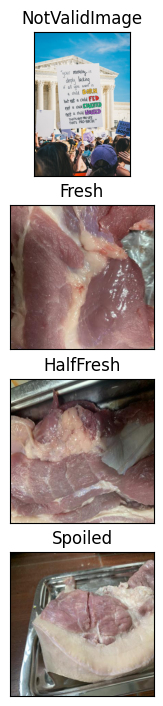

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

**PREPROCESSING OF THE IMAGE**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory('tmp/MeatFreshness/Training', 
                                                    target_size=(150, 150),  # All images will be resized to 150x150
                                                    batch_size=32,
                                                    seed=42,
                                                    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory('tmp/MeatFreshness/Validation',
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      seed=42,
                                                      class_mode='categorical',
                                                      shuffle=False
)

Found 2415 images belonging to 4 classes.
Found 653 images belonging to 4 classes.


**BUILD THE MODEL**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate =0.0001),
              metrics = ["accuracy"])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:                 
                print("\nReached 95% accuracy so cancelling training!")
                
                # Stop training once the above condition is met
                self.model.stop_training = True

callbacks = myCallback()

In [32]:
history = model.fit(
      train_generator,  
      epochs=85,
      batch_size=32,
      validation_data = validation_generator,
      callbacks = [callbacks],
      verbose = 1)

Epoch 1/85
76/76 [==============================] - 133s 2s/step - loss: 1.2586 - accuracy: 0.4186 - val_loss: 1.0765 - val_accuracy: 0.4487
Epoch 2/85
76/76 [==============================] - 132s 2s/step - loss: 0.9331 - accuracy: 0.5491 - val_loss: 0.8198 - val_accuracy: 0.6294
Epoch 3/85
76/76 [==============================] - 133s 2s/step - loss: 0.8232 - accuracy: 0.6095 - val_loss: 0.7819 - val_accuracy: 0.6233
Epoch 4/85
76/76 [==============================] - 130s 2s/step - loss: 0.7674 - accuracy: 0.6451 - val_loss: 0.6664 - val_accuracy: 0.6784
Epoch 5/85
76/76 [==============================] - 133s 2s/step - loss: 0.7313 - accuracy: 0.6505 - val_loss: 0.6421 - val_accuracy: 0.6937
Epoch 6/85
76/76 [==============================] - 130s 2s/step - loss: 0.7051 - accuracy: 0.6708 - val_loss: 0.6444 - val_accuracy: 0.6784
Epoch 7/85
76/76 [==============================] - 158s 2s/step - loss: 0.6595 - accuracy: 0.6923 - val_loss: 0.5993 - val_accuracy: 0.7106
Epoch 8/85
76

Text(0.5, 1.0, 'Training and validation loss')

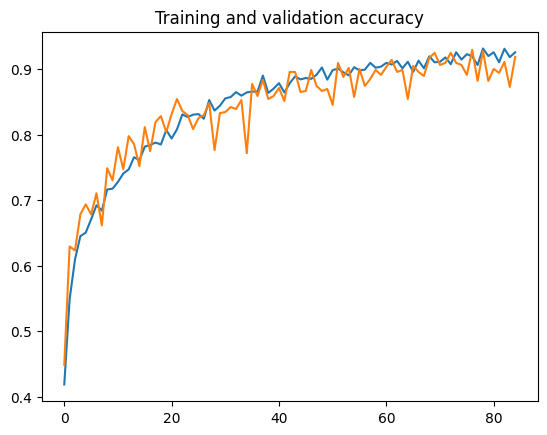

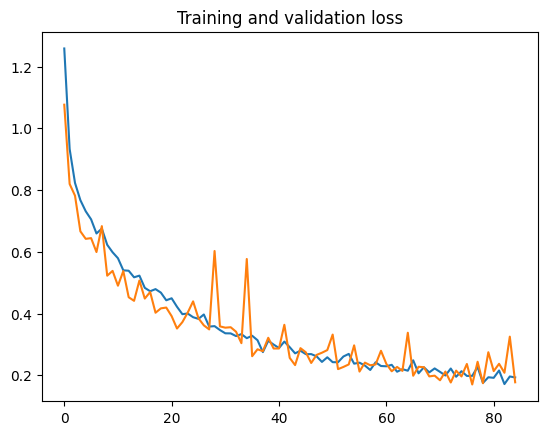

In [37]:
# Retrieve a list of list results on training and test data
# sets for each training epoch

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Saving image2.jpg to image2.jpg
1/1 [==============================] - 0s 28ms/step
Prediction is : Fresh


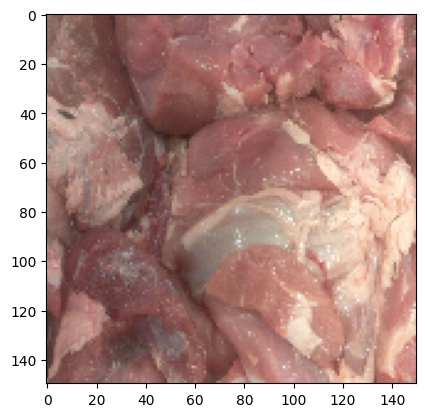

['Fresh', 'HalfFresh', 'NotValidImage', 'Spoiled']
[[7.4340278e-01 2.5657779e-01 5.9795325e-06 1.3487749e-05]]


In [45]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = my_model.predict(images)
  classes = list(train_generator.class_indices.keys())
  print(f"Prediction is : {classes[np.argmax(pred)]}")
  plt.imshow(img)
  plt.show()

  print(classes)
  print(pred)

In [39]:
model.save("MeatFreshness_classify.h5")

In [40]:
my_model = tf.keras.models.load_model("MeatFreshness_classify.h5")

In [41]:
import tensorflow as tf

model = tf.keras.models.load_model('MeatFreshness_classify.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'MeatFreshness.tflite' , 'wb' ) 
file.write( tflmodel )

2175356